In [1]:
import tensorflow as tf
import numpy      as np
import pandas     as pd
import seaborn    as sns

from   tensorflow.keras.models import  Sequential , clone_model
from   tensorflow.keras.layers import  Dense , Activation , InputLayer

from tensorflow.keras.datasets import boston_housing , mnist, fashion_mnist
from tensorflow.keras.models   import Sequential , clone_model , Model, load_model
from tensorflow.keras.layers   import Dense , Activation , InputLayer , Flatten , Input, BatchNormalization, Dropout, Embedding
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras          import optimizers  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback  
try:
    from keras.utils.np_utils      import to_categorical
except:
    from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# 자연어처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import missingno as msno

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import tensorflow as tf
import numpy      as np
import pandas     as pd
import seaborn    as sns
import time
import itertools 

from   tensorflow.keras.models import  Sequential , clone_model
from   tensorflow.keras.layers import  Dense , Activation , InputLayer

from tensorflow.keras.datasets import boston_housing , mnist, fashion_mnist
from tensorflow.keras.models   import Sequential , clone_model , Model, load_model
from tensorflow.keras.layers   import Dense , Activation , InputLayer , Flatten , Input, BatchNormalization, Dropout, Embedding
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras          import optimizers  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback  
try:
    from keras.utils.np_utils      import to_categorical
except:
    from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# 자연어처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import missingno as msno

# p-value and vif check
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# RNN
from tensorflow.keras.layers     import SimpleRNN, LSTM

# ml
import sklearn
from   sklearn.model_selection import train_test_split , KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline

 # LogisticRegression : 0, 1 로 나누기 때문에 회귀가 아니라 분류로 본다!
from   sklearn.linear_model    import LogisticRegression , LinearRegression , Ridge, Lasso, ElasticNet, SGDRegressor, LassoCV, ElasticNetCV

from   sklearn.tree            import DecisionTreeRegressor
from   sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from   xgboost                 import XGBRegressor
from   lightgbm                import LGBMRegressor
from   sklearn.svm             import SVC, SVR
from   sklearn.neighbors       import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA

# 분류 쪽 성능평가
from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve, roc_curve, roc_auc_score

# 회귀 쪽 성능평가
from   sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer, PolynomialFeatures
from   sklearn.impute          import SimpleImputer

# 분류 알고리즘 만들 때 사용되는 최상위 알고리즘 > 여기서 상속받아서 알고리즘 생성 가능
from   sklearn.base            import BaseEstimator

# 부스팅 알고리즘
import xgboost as xgb
from   xgboost import plot_importance
from   xgboost import XGBClassifier

import lightgbm as light
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

# from imblearn.over_sampling  import SMOTE

In [4]:
# male_frm = pd.read_csv('../content/hospital_male_0802_test.csv', encoding='cp949')
male_frm = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0802_test.csv', encoding='cp949')

In [5]:
# VIF Factor 보기 전 컬럼들 선별작업. 최고저, 차이 기상데이터는 서로 영향을 많이 주므로 나올 수 있는 가짓수 다 넣어봄.
# EDA 결과 차이 기상데이터는 질환발생과 연관이 있다고 판단되어 fix함.

ps_list=[]
temp_list=[]
hum_list=[]
avg_ps = male_frm[["avg_ps"]]
max_ps = male_frm[["max_ps"]]
min_ps = male_frm[["min_ps"]]
max_temp = male_frm[["max_temp"]]
min_temp = male_frm[["min_temp"]]
avg_temp = male_frm[["avg_temp"]]
avg_hum = male_frm[["avg_hum"]]
min_hum = male_frm[["min_hum"]]
max_hum = male_frm[["max_hum"]]
ps_list.append(avg_ps)
ps_list.append(max_ps)
ps_list.append(min_ps)
temp_list.append(avg_temp)
temp_list.append(max_temp)
temp_list.append(min_temp)
hum_list.append(avg_hum)
hum_list.append(min_hum)
hum_list.append(max_hum)

In [7]:
encoder = LabelEncoder()
male_frm["area_encoded"] = encoder.fit_transform(male_frm.area)

In [8]:
encoder.classes_

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [9]:
# VIF Factor 보는데 필요 없는 컬럼 제거(자동화)
vif_male = male_frm.drop(columns=["area","tma", "yyyy", "dd", "sum_gsr", "sum_rn", "avg_ps", "max_ps", "min_ps","sex","frequency","D/R","min_hum","max_hum","avg_hum", "min_temp", "max_temp", "avg_temp"])

In [ ]:
final_result = []
vif_m = pd.DataFrame()
for i in ps_list:
    a = pd.concat([vif_male, i], axis=1)
    for k in temp_list:
        b = pd.concat([a, k], axis = 1)
        for l in hum_list:
            c = pd.concat([b, l], axis = 1)
            vif_m["VIF Factor"] = [variance_inflation_factor(c.values, n)  for n in range(c.shape[1])]
            vif_m["features"] = c.columns
            vif_sorted_by_index = vif_m.sort_values(by="VIF Factor",ascending=True)
            display( vif_sorted_by_index[vif_sorted_by_index["VIF Factor"]<10])
    c = pd.DataFrame()
    b = pd.DataFrame()
    a = pd.DataFrame()

,VIF Factor,features
11,1.119558,cold_wave
10,1.142012,heat_wave
9,1.449023,min_max_ps
1,3.281636,weekday
14,4.616131,area_encoded
0,5.738324,mm
4,7.274142,pm10
2,8.141531,so2
16,8.646597,avg_temp


,VIF Factor,features
11,1.122069,cold_wave
10,1.143126,heat_wave
9,1.448844,min_max_ps
1,3.281853,weekday
14,4.627425,area_encoded
0,5.740485,mm
4,7.269565,pm10
2,8.134086,so2
16,8.316125,avg_temp


,VIF Factor,features
11,1.122069,cold_wave
10,1.143126,heat_wave
9,1.448844,min_max_ps
1,3.281853,weekday
14,4.627425,area_encoded
0,5.740485,mm
4,7.269565,pm10
2,8.134086,so2
16,8.316125,avg_temp


,VIF Factor,features
11,1.122213,cold_wave
10,1.142488,heat_wave
9,1.449011,min_max_ps
1,3.281689,weekday
14,4.614912,area_encoded
0,5.714154,mm
4,7.265616,pm10
2,8.137621,so2


,VIF Factor,features
11,1.124761,cold_wave
10,1.143238,heat_wave
9,1.448762,min_max_ps
1,3.281805,weekday
14,4.625429,area_encoded
0,5.717126,mm
4,7.260882,pm10
2,8.130158,so2


,VIF Factor,features
11,1.124761,cold_wave
10,1.143238,heat_wave
9,1.448762,min_max_ps
1,3.281805,weekday
14,4.625429,area_encoded
0,5.717126,mm
4,7.260882,pm10
2,8.130158,so2


,VIF Factor,features
11,1.122213,cold_wave
10,1.142488,heat_wave
9,1.449011,min_max_ps
1,3.281689,weekday
14,4.614912,area_encoded
16,5.078818,min_temp
0,5.714154,mm
4,7.265616,pm10
2,8.137621,so2


,VIF Factor,features
11,1.124761,cold_wave
10,1.143238,heat_wave
9,1.448762,min_max_ps
1,3.281805,weekday
14,4.625429,area_encoded
16,4.856579,min_temp
0,5.717126,mm
4,7.260882,pm10
2,8.130158,so2


,VIF Factor,features
11,1.124761,cold_wave
10,1.143238,heat_wave
9,1.448762,min_max_ps
1,3.281805,weekday
14,4.625429,area_encoded
16,4.856579,min_temp
0,5.717126,mm
4,7.260882,pm10
2,8.130158,so2


,VIF Factor,features
11,1.119458,cold_wave
10,1.141836,heat_wave
9,1.183102,min_max_ps
1,3.281556,weekday
14,4.615558,area_encoded
0,5.740269,mm
4,7.280891,pm10
2,8.143489,so2
16,8.616460,avg_temp


,VIF Factor,features
11,1.121937,cold_wave
10,1.142943,heat_wave
9,1.182763,min_max_ps
1,3.281778,weekday
14,4.626697,area_encoded
0,5.742446,mm
4,7.276412,pm10
2,8.136018,so2
16,8.287290,avg_temp


,VIF Factor,features
11,1.121937,cold_wave
10,1.142943,heat_wave
9,1.182763,min_max_ps
1,3.281778,weekday
14,4.626697,area_encoded
0,5.742446,mm
4,7.276412,pm10
2,8.136018,so2
16,8.287290,avg_temp


,VIF Factor,features
11,1.122105,cold_wave
10,1.142297,heat_wave
9,1.183248,min_max_ps
1,3.281606,weekday
14,4.614382,area_encoded
0,5.716247,mm
4,7.272124,pm10
2,8.139754,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,1.182873,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,1.182873,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.122105,cold_wave
10,1.142297,heat_wave
9,1.183248,min_max_ps
1,3.281606,weekday
14,4.614382,area_encoded
16,5.061111,min_temp
0,5.716247,mm
4,7.272124,pm10
2,8.139754,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,1.182873,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
16,4.839812,min_temp
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,1.182873,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
16,4.839812,min_temp
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.119458,cold_wave
10,1.141836,heat_wave
9,2.963925,min_max_ps
1,3.281556,weekday
14,4.615558,area_encoded
0,5.740269,mm
4,7.280891,pm10
2,8.143489,so2
16,8.616460,avg_temp


,VIF Factor,features
11,1.121937,cold_wave
10,1.142943,heat_wave
9,2.964538,min_max_ps
1,3.281778,weekday
14,4.626697,area_encoded
0,5.742446,mm
4,7.276412,pm10
2,8.136018,so2
16,8.287290,avg_temp


,VIF Factor,features
11,1.121937,cold_wave
10,1.142943,heat_wave
9,2.964538,min_max_ps
1,3.281778,weekday
14,4.626697,area_encoded
0,5.742446,mm
4,7.276412,pm10
2,8.136018,so2
16,8.287290,avg_temp


,VIF Factor,features
11,1.122105,cold_wave
10,1.142297,heat_wave
9,2.962656,min_max_ps
1,3.281606,weekday
14,4.614382,area_encoded
0,5.716247,mm
4,7.272124,pm10
2,8.139754,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,2.963155,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,2.963155,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.122105,cold_wave
10,1.142297,heat_wave
9,2.962656,min_max_ps
1,3.281606,weekday
14,4.614382,area_encoded
16,5.061111,min_temp
0,5.716247,mm
4,7.272124,pm10
2,8.139754,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,2.963155,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
16,4.839812,min_temp
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


,VIF Factor,features
11,1.124623,cold_wave
10,1.143044,heat_wave
9,2.963155,min_max_ps
1,3.281725,weekday
14,4.624758,area_encoded
16,4.839812,min_temp
0,5.719235,mm
4,7.267489,pm10
2,8.132255,so2


<AxesSubplot:>

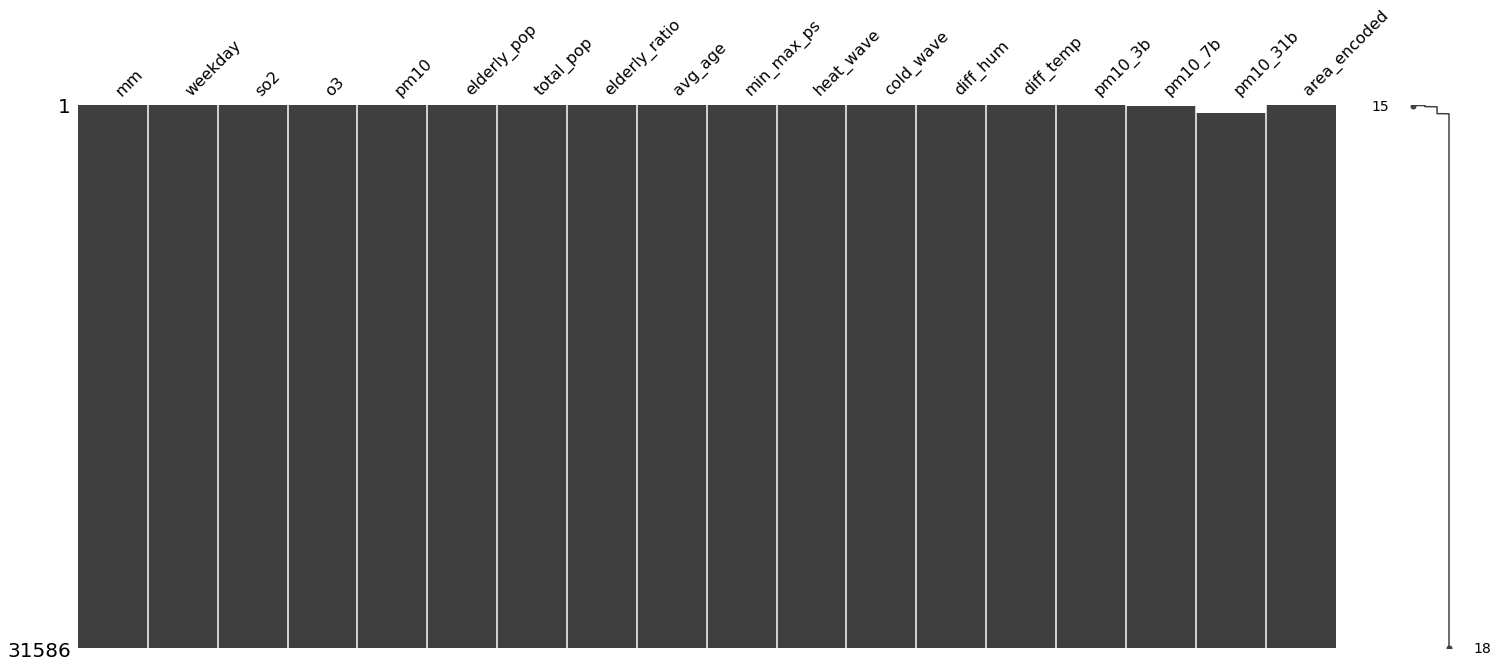

In [11]:
msno.matrix(vif_male) # pm10_31b 의 경우 NaN 값 존재 > 2012년~2015년 데이터로 vif 확인 필요

In [19]:
male_frm_ = male_frm[~male_frm.yyyy.isin([2011,2016])]

In [24]:
avg_ps = male_frm_[["avg_ps"]]
max_ps = male_frm_[["max_ps"]]
min_ps = male_frm_[["min_ps"]]
max_temp = male_frm_[["max_temp"]]
min_temp = male_frm_[["min_temp"]]
avg_temp = male_frm_[["avg_temp"]]
avg_hum = male_frm_[["avg_hum"]]
min_hum = male_frm_[["min_hum"]]
max_hum = male_frm_[["max_hum"]]

# pm10 지연효과 확인위해 추가로 리스트 생성
pm10 = male_frm_[['pm10']]
pm10_3b = male_frm_[['pm10_3b']]
pm10_7b = male_frm_[['pm10_7b']]
pm10_31b = male_frm_[['pm10_31b']]

ps_list = [avg_ps, max_ps, min_ps]
temp_list = [avg_temp, max_temp, min_temp]
hum_list = [avg_hum, max_hum, min_hum]
pm10_list = [pm10, pm10_3b, pm10_7b, pm10_31b]

In [25]:
# VIF Factor 보는데 필요 없는 컬럼 제거(자동화)
vif_male = male_frm_.drop(columns=["area","tma", "yyyy", "dd", "sum_gsr", "sum_rn", "avg_ps", "max_ps", "min_ps","sex","frequency","D/R","min_hum","max_hum","avg_hum", "min_temp", "max_temp", "avg_temp",
                                  'pm10', 'pm10_3b', 'pm10_7b','pm10_31b'])

In [26]:
final_result = []
vif_m = pd.DataFrame()
for i in ps_list:
    a = pd.concat([vif_male, i], axis=1)
    for k in temp_list:
        b = pd.concat([a, k], axis = 1)
        for l in hum_list:
            c = pd.concat([b, l], axis = 1)
            for m in pm10_list :
                d = pd.concat([c, m], axis = 1)
                vif_m["VIF Factor"] = [variance_inflation_factor(d.values, n)  for n in range(d.shape[1])]
                vif_m["features"] = d.columns
                vif_sorted_by_index = vif_m.sort_values(by="VIF Factor",ascending=True)
                display( vif_sorted_by_index[vif_sorted_by_index["VIF Factor"]<10])
                
    d = pd.DataFrame()
    c = pd.DataFrame()
    b = pd.DataFrame()
    a = pd.DataFrame()

,VIF Factor,features
10,1.128128,cold_wave
9,1.144269,heat_wave
8,1.432932,min_max_ps
1,3.280657,weekday
13,4.688874,area_encoded
0,5.893067,mm
17,7.233776,pm10
2,8.401387,so2
15,8.830143,avg_temp


,VIF Factor,features
10,1.117731,cold_wave
9,1.144243,heat_wave
8,1.432019,min_max_ps
1,3.270846,weekday
13,4.683381,area_encoded
17,5.227706,pm10_3b
0,6.091888,mm
2,6.838910,so2
15,8.870023,avg_temp


,VIF Factor,features
10,1.116786,cold_wave
9,1.144144,heat_wave
8,1.432074,min_max_ps
1,3.276093,weekday
13,4.685014,area_encoded
17,5.193090,pm10_7b
0,6.101763,mm
2,6.845355,so2
15,8.796366,avg_temp


,VIF Factor,features
10,1.115250,cold_wave
9,1.149410,heat_wave
8,1.432290,min_max_ps
1,3.271196,weekday
13,4.682142,area_encoded
17,5.020720,pm10_31b
0,6.088088,mm
2,6.829722,so2
15,8.729980,avg_temp


,VIF Factor,features
10,1.130833,cold_wave
9,1.147137,heat_wave
8,1.432932,min_max_ps
1,3.280922,weekday
13,4.698139,area_encoded
0,5.891854,mm
17,7.227132,pm10
2,8.391510,so2
15,8.516675,avg_temp


,VIF Factor,features
10,1.120248,cold_wave
9,1.147111,heat_wave
8,1.431982,min_max_ps
1,3.271161,weekday
13,4.692908,area_encoded
17,5.228958,pm10_3b
0,6.091658,mm
2,6.819900,so2
15,8.576721,avg_temp


,VIF Factor,features
10,1.119289,cold_wave
9,1.146999,heat_wave
8,1.432033,min_max_ps
1,3.276486,weekday
13,4.694442,area_encoded
17,5.194872,pm10_7b
0,6.101730,mm
2,6.826348,so2
15,8.503757,avg_temp


,VIF Factor,features
10,1.117647,cold_wave
9,1.152150,heat_wave
8,1.432251,min_max_ps
1,3.271511,weekday
13,4.691667,area_encoded
17,5.021492,pm10_31b
0,6.087418,mm
2,6.810890,so2
15,8.431160,avg_temp


,VIF Factor,features
10,1.130833,cold_wave
9,1.147137,heat_wave
8,1.432932,min_max_ps
1,3.280922,weekday
13,4.698139,area_encoded
0,5.891854,mm
17,7.227132,pm10
2,8.391510,so2
15,8.516675,avg_temp


,VIF Factor,features
10,1.120248,cold_wave
9,1.147111,heat_wave
8,1.431982,min_max_ps
1,3.271161,weekday
13,4.692908,area_encoded
17,5.228958,pm10_3b
0,6.091658,mm
2,6.819900,so2
15,8.576721,avg_temp


,VIF Factor,features
10,1.119289,cold_wave
9,1.146999,heat_wave
8,1.432033,min_max_ps
1,3.276486,weekday
13,4.694442,area_encoded
17,5.194872,pm10_7b
0,6.101730,mm
2,6.826348,so2
15,8.503757,avg_temp


,VIF Factor,features
10,1.117647,cold_wave
9,1.152150,heat_wave
8,1.432251,min_max_ps
1,3.271511,weekday
13,4.691667,area_encoded
17,5.021492,pm10_31b
0,6.087418,mm
2,6.810890,so2
15,8.431160,avg_temp


,VIF Factor,features
10,1.131071,cold_wave
9,1.144635,heat_wave
8,1.432980,min_max_ps
1,3.280642,weekday
13,4.687610,area_encoded
0,5.861676,mm
17,7.225631,pm10
2,8.399464,so2


,VIF Factor,features
10,1.120742,cold_wave
9,1.144592,heat_wave
8,1.432045,min_max_ps
1,3.270910,weekday
13,4.681951,area_encoded
17,5.229964,pm10_3b
0,6.062224,mm
2,6.829250,so2


,VIF Factor,features
10,1.119716,cold_wave
9,1.144481,heat_wave
8,1.432101,min_max_ps
1,3.276167,weekday
13,4.683606,area_encoded
17,5.192523,pm10_7b
0,6.072063,mm
2,6.835986,so2


,VIF Factor,features
10,1.118101,cold_wave
9,1.149793,heat_wave
8,1.432320,min_max_ps
1,3.271278,weekday
13,4.680610,area_encoded
17,5.019702,pm10_31b
0,6.057530,mm
2,6.820204,so2


,VIF Factor,features
10,1.133827,cold_wave
9,1.146931,heat_wave
8,1.432916,min_max_ps
1,3.280827,weekday
13,4.695830,area_encoded
0,5.860933,mm
17,7.219038,pm10
2,8.389338,so2


,VIF Factor,features
10,1.123359,cold_wave
9,1.146876,heat_wave
8,1.431940,min_max_ps
1,3.271162,weekday
13,4.690411,area_encoded
17,5.230899,pm10_3b
0,6.062554,mm
2,6.809993,so2


,VIF Factor,features
10,1.122319,cold_wave
9,1.146756,heat_wave
8,1.431993,min_max_ps
1,3.276484,weekday
13,4.691978,area_encoded
17,5.193995,pm10_7b
0,6.072664,mm
2,6.816730,so2


,VIF Factor,features
10,1.120605,cold_wave
9,1.151980,heat_wave
8,1.432216,min_max_ps
1,3.271530,weekday
13,4.689062,area_encoded
17,5.020190,pm10_31b
0,6.057491,mm
2,6.801096,so2


,VIF Factor,features
10,1.133827,cold_wave
9,1.146931,heat_wave
8,1.432916,min_max_ps
1,3.280827,weekday
13,4.695830,area_encoded
0,5.860933,mm
17,7.219038,pm10
2,8.389338,so2


,VIF Factor,features
10,1.123359,cold_wave
9,1.146876,heat_wave
8,1.431940,min_max_ps
1,3.271162,weekday
13,4.690411,area_encoded
17,5.230899,pm10_3b
0,6.062554,mm
2,6.809993,so2


,VIF Factor,features
10,1.122319,cold_wave
9,1.146756,heat_wave
8,1.431993,min_max_ps
1,3.276484,weekday
13,4.691978,area_encoded
17,5.193995,pm10_7b
0,6.072664,mm
2,6.816730,so2


,VIF Factor,features
10,1.120605,cold_wave
9,1.151980,heat_wave
8,1.432216,min_max_ps
1,3.271530,weekday
13,4.689062,area_encoded
17,5.020190,pm10_31b
0,6.057491,mm
2,6.801096,so2


,VIF Factor,features
10,1.131071,cold_wave
9,1.144635,heat_wave
8,1.432980,min_max_ps
1,3.280642,weekday
13,4.687610,area_encoded
15,5.154926,min_temp
0,5.861676,mm
17,7.225631,pm10
2,8.399464,so2


,VIF Factor,features
10,1.120742,cold_wave
9,1.144592,heat_wave
8,1.432045,min_max_ps
1,3.270910,weekday
13,4.681951,area_encoded
15,5.186284,min_temp
17,5.229964,pm10_3b
0,6.062224,mm
2,6.829250,so2


,VIF Factor,features
10,1.119716,cold_wave
9,1.144481,heat_wave
8,1.432101,min_max_ps
1,3.276167,weekday
13,4.683606,area_encoded
15,5.140434,min_temp
17,5.192523,pm10_7b
0,6.072063,mm
2,6.835986,so2


,VIF Factor,features
10,1.118101,cold_wave
9,1.149793,heat_wave
8,1.432320,min_max_ps
1,3.271278,weekday
13,4.680610,area_encoded
17,5.019702,pm10_31b
15,5.101162,min_temp
0,6.057530,mm
2,6.820204,so2


,VIF Factor,features
10,1.133827,cold_wave
9,1.146931,heat_wave
8,1.432916,min_max_ps
1,3.280827,weekday
13,4.695830,area_encoded
15,4.940733,min_temp
0,5.860933,mm
17,7.219038,pm10
2,8.389338,so2


,VIF Factor,features
10,1.123359,cold_wave
9,1.146876,heat_wave
8,1.431940,min_max_ps
1,3.271162,weekday
13,4.690411,area_encoded
15,4.982995,min_temp
17,5.230899,pm10_3b
0,6.062554,mm
2,6.809993,so2


,VIF Factor,features
10,1.122319,cold_wave
9,1.146756,heat_wave
8,1.431993,min_max_ps
1,3.276484,weekday
13,4.691978,area_encoded
15,4.937936,min_temp
17,5.193995,pm10_7b
0,6.072664,mm
2,6.816730,so2


,VIF Factor,features
10,1.120605,cold_wave
9,1.151980,heat_wave
8,1.432216,min_max_ps
1,3.271530,weekday
13,4.689062,area_encoded
15,4.895337,min_temp
17,5.020190,pm10_31b
0,6.057491,mm
2,6.801096,so2


,VIF Factor,features
10,1.133827,cold_wave
9,1.146931,heat_wave
8,1.432916,min_max_ps
1,3.280827,weekday
13,4.695830,area_encoded
15,4.940733,min_temp
0,5.860933,mm
17,7.219038,pm10
2,8.389338,so2


,VIF Factor,features
10,1.123359,cold_wave
9,1.146876,heat_wave
8,1.431940,min_max_ps
1,3.271162,weekday
13,4.690411,area_encoded
15,4.982995,min_temp
17,5.230899,pm10_3b
0,6.062554,mm
2,6.809993,so2


,VIF Factor,features
10,1.122319,cold_wave
9,1.146756,heat_wave
8,1.431993,min_max_ps
1,3.276484,weekday
13,4.691978,area_encoded
15,4.937936,min_temp
17,5.193995,pm10_7b
0,6.072664,mm
2,6.816730,so2


,VIF Factor,features
10,1.120605,cold_wave
9,1.151980,heat_wave
8,1.432216,min_max_ps
1,3.271530,weekday
13,4.689062,area_encoded
15,4.895337,min_temp
17,5.020190,pm10_31b
0,6.057491,mm
2,6.801096,so2


,VIF Factor,features
10,1.128093,cold_wave
9,1.144407,heat_wave
8,1.178237,min_max_ps
1,3.280824,weekday
13,4.687690,area_encoded
0,5.901421,mm
17,7.246809,pm10
2,8.404133,so2
15,8.810871,avg_temp


,VIF Factor,features
10,1.117702,cold_wave
9,1.144399,heat_wave
8,1.176329,min_max_ps
1,3.270907,weekday
13,4.682241,area_encoded
17,5.228177,pm10_3b
0,6.099618,mm
2,6.838902,so2
15,8.850220,avg_temp


,VIF Factor,features
10,1.116752,cold_wave
9,1.144297,heat_wave
8,1.176626,min_max_ps
1,3.276185,weekday
13,4.683908,area_encoded
17,5.193257,pm10_7b
0,6.109457,mm
2,6.845354,so2
15,8.775684,avg_temp


,VIF Factor,features
10,1.115226,cold_wave
9,1.149515,heat_wave
8,1.176707,min_max_ps
1,3.271252,weekday
13,4.680987,area_encoded
17,5.022573,pm10_31b
0,6.096887,mm
2,6.829712,so2
15,8.710710,avg_temp


,VIF Factor,features
10,1.130779,cold_wave
9,1.147266,heat_wave
8,1.178048,min_max_ps
1,3.281094,weekday
13,4.696762,area_encoded
0,5.900253,mm
17,7.240265,pm10
2,8.394205,so2
15,8.497222,avg_temp


,VIF Factor,features
10,1.120201,cold_wave
9,1.147259,heat_wave
8,1.176092,min_max_ps
1,3.271226,weekday
13,4.691573,area_encoded
17,5.229427,pm10_3b
0,6.099429,mm
2,6.819899,so2
15,8.556592,avg_temp


,VIF Factor,features
10,1.119237,cold_wave
9,1.147145,heat_wave
8,1.176385,min_max_ps
1,3.276583,weekday
13,4.693145,area_encoded
17,5.195008,pm10_7b
0,6.109460,mm
2,6.826348,so2
15,8.482724,avg_temp


,VIF Factor,features
10,1.117605,cold_wave
9,1.152247,heat_wave
8,1.176476,min_max_ps
1,3.271570,weekday
13,4.690319,area_encoded
17,5.023377,pm10_31b
0,6.096272,mm
2,6.810886,so2
15,8.411589,avg_temp


,VIF Factor,features
10,1.130779,cold_wave
9,1.147266,heat_wave
8,1.178048,min_max_ps
1,3.281094,weekday
13,4.696762,area_encoded
0,5.900253,mm
17,7.240265,pm10
2,8.394205,so2
15,8.497222,avg_temp


,VIF Factor,features
10,1.120201,cold_wave
9,1.147259,heat_wave
8,1.176092,min_max_ps
1,3.271226,weekday
13,4.691573,area_encoded
17,5.229427,pm10_3b
0,6.099429,mm
2,6.819899,so2
15,8.556592,avg_temp


,VIF Factor,features
10,1.119237,cold_wave
9,1.147145,heat_wave
8,1.176385,min_max_ps
1,3.276583,weekday
13,4.693145,area_encoded
17,5.195008,pm10_7b
0,6.109460,mm
2,6.826348,so2
15,8.482724,avg_temp


,VIF Factor,features
10,1.117605,cold_wave
9,1.152247,heat_wave
8,1.176476,min_max_ps
1,3.271570,weekday
13,4.690319,area_encoded
17,5.023377,pm10_31b
0,6.096272,mm
2,6.810886,so2
15,8.411589,avg_temp


,VIF Factor,features
10,1.131029,cold_wave
9,1.144741,heat_wave
8,1.178393,min_max_ps
1,3.280798,weekday
13,4.686462,area_encoded
0,5.870315,mm
17,7.238364,pm10
2,8.402402,so2


,VIF Factor,features
10,1.120711,cold_wave
9,1.144715,heat_wave
8,1.176472,min_max_ps
1,3.270966,weekday
13,4.680848,area_encoded
17,5.230383,pm10_3b
0,6.070144,mm
2,6.829250,so2


,VIF Factor,features
10,1.119680,cold_wave
9,1.144602,heat_wave
8,1.176770,min_max_ps
1,3.276253,weekday
13,4.682538,area_encoded
17,5.192639,pm10_7b
0,6.079949,mm
2,6.835995,so2


,VIF Factor,features
10,1.118075,cold_wave
9,1.149869,heat_wave
8,1.176854,min_max_ps
1,3.271329,weekday
13,4.679491,area_encoded
17,5.021498,pm10_31b
0,6.066573,mm
2,6.820202,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,1.178171,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,1.176200,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,1.176494,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,1.176588,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,1.178171,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,1.176200,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,1.176494,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,1.176588,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.131029,cold_wave
9,1.144741,heat_wave
8,1.178393,min_max_ps
1,3.280798,weekday
13,4.686462,area_encoded
15,5.143477,min_temp
0,5.870315,mm
17,7.238364,pm10
2,8.402402,so2


,VIF Factor,features
10,1.120711,cold_wave
9,1.144715,heat_wave
8,1.176472,min_max_ps
1,3.270966,weekday
13,4.680848,area_encoded
15,5.174658,min_temp
17,5.230383,pm10_3b
0,6.070144,mm
2,6.829250,so2


,VIF Factor,features
10,1.119680,cold_wave
9,1.144602,heat_wave
8,1.176770,min_max_ps
1,3.276253,weekday
13,4.682538,area_encoded
15,5.128303,min_temp
17,5.192639,pm10_7b
0,6.079949,mm
2,6.835995,so2


,VIF Factor,features
10,1.118075,cold_wave
9,1.149869,heat_wave
8,1.176854,min_max_ps
1,3.271329,weekday
13,4.679491,area_encoded
17,5.021498,pm10_31b
15,5.089849,min_temp
0,6.066573,mm
2,6.820202,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,1.178171,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
15,4.929326,min_temp
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,1.176200,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
15,4.971316,min_temp
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,1.176494,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
15,4.925743,min_temp
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,1.176588,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
15,4.883981,min_temp
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,1.178171,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
15,4.929326,min_temp
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,1.176200,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
15,4.971316,min_temp
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,1.176494,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
15,4.925743,min_temp
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,1.176588,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
15,4.883981,min_temp
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.128093,cold_wave
9,1.144407,heat_wave
8,2.778497,min_max_ps
1,3.280824,weekday
13,4.687690,area_encoded
0,5.901421,mm
17,7.246809,pm10
2,8.404133,so2
15,8.810871,avg_temp


,VIF Factor,features
10,1.117702,cold_wave
9,1.144399,heat_wave
8,2.778154,min_max_ps
1,3.270907,weekday
13,4.682241,area_encoded
17,5.228177,pm10_3b
0,6.099618,mm
2,6.838902,so2
15,8.850220,avg_temp


,VIF Factor,features
10,1.116752,cold_wave
9,1.144297,heat_wave
8,2.778180,min_max_ps
1,3.276185,weekday
13,4.683908,area_encoded
17,5.193257,pm10_7b
0,6.109457,mm
2,6.845354,so2
15,8.775684,avg_temp


,VIF Factor,features
10,1.115226,cold_wave
9,1.149515,heat_wave
8,2.778107,min_max_ps
1,3.271252,weekday
13,4.680987,area_encoded
17,5.022573,pm10_31b
0,6.096887,mm
2,6.829712,so2
15,8.710710,avg_temp


,VIF Factor,features
10,1.130779,cold_wave
9,1.147266,heat_wave
8,2.778899,min_max_ps
1,3.281094,weekday
13,4.696762,area_encoded
0,5.900253,mm
17,7.240265,pm10
2,8.394205,so2
15,8.497222,avg_temp


,VIF Factor,features
10,1.120201,cold_wave
9,1.147259,heat_wave
8,2.778579,min_max_ps
1,3.271226,weekday
13,4.691573,area_encoded
17,5.229427,pm10_3b
0,6.099429,mm
2,6.819899,so2
15,8.556592,avg_temp


,VIF Factor,features
10,1.119237,cold_wave
9,1.147145,heat_wave
8,2.778609,min_max_ps
1,3.276583,weekday
13,4.693145,area_encoded
17,5.195008,pm10_7b
0,6.109460,mm
2,6.826348,so2
15,8.482724,avg_temp


,VIF Factor,features
10,1.117605,cold_wave
9,1.152247,heat_wave
8,2.778529,min_max_ps
1,3.271570,weekday
13,4.690319,area_encoded
17,5.023377,pm10_31b
0,6.096272,mm
2,6.810886,so2
15,8.411589,avg_temp


,VIF Factor,features
10,1.130779,cold_wave
9,1.147266,heat_wave
8,2.778899,min_max_ps
1,3.281094,weekday
13,4.696762,area_encoded
0,5.900253,mm
17,7.240265,pm10
2,8.394205,so2
15,8.497222,avg_temp


,VIF Factor,features
10,1.120201,cold_wave
9,1.147259,heat_wave
8,2.778579,min_max_ps
1,3.271226,weekday
13,4.691573,area_encoded
17,5.229427,pm10_3b
0,6.099429,mm
2,6.819899,so2
15,8.556592,avg_temp


,VIF Factor,features
10,1.119237,cold_wave
9,1.147145,heat_wave
8,2.778609,min_max_ps
1,3.276583,weekday
13,4.693145,area_encoded
17,5.195008,pm10_7b
0,6.109460,mm
2,6.826348,so2
15,8.482724,avg_temp


,VIF Factor,features
10,1.117605,cold_wave
9,1.152247,heat_wave
8,2.778529,min_max_ps
1,3.271570,weekday
13,4.690319,area_encoded
17,5.023377,pm10_31b
0,6.096272,mm
2,6.810886,so2
15,8.411589,avg_temp


,VIF Factor,features
10,1.131029,cold_wave
9,1.144741,heat_wave
8,2.777673,min_max_ps
1,3.280798,weekday
13,4.686462,area_encoded
0,5.870315,mm
17,7.238364,pm10
2,8.402402,so2


,VIF Factor,features
10,1.120711,cold_wave
9,1.144715,heat_wave
8,2.777361,min_max_ps
1,3.270966,weekday
13,4.680848,area_encoded
17,5.230383,pm10_3b
0,6.070144,mm
2,6.829250,so2


,VIF Factor,features
10,1.119680,cold_wave
9,1.144602,heat_wave
8,2.777385,min_max_ps
1,3.276253,weekday
13,4.682538,area_encoded
17,5.192639,pm10_7b
0,6.079949,mm
2,6.835995,so2


,VIF Factor,features
10,1.118075,cold_wave
9,1.149869,heat_wave
8,2.777317,min_max_ps
1,3.271329,weekday
13,4.679491,area_encoded
17,5.021498,pm10_31b
0,6.066573,mm
2,6.820202,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,2.777992,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,2.777703,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,2.777730,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,2.777657,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,2.777992,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,2.777703,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,2.777730,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,2.777657,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.131029,cold_wave
9,1.144741,heat_wave
8,2.777673,min_max_ps
1,3.280798,weekday
13,4.686462,area_encoded
15,5.143477,min_temp
0,5.870315,mm
17,7.238364,pm10
2,8.402402,so2


,VIF Factor,features
10,1.120711,cold_wave
9,1.144715,heat_wave
8,2.777361,min_max_ps
1,3.270966,weekday
13,4.680848,area_encoded
15,5.174658,min_temp
17,5.230383,pm10_3b
0,6.070144,mm
2,6.829250,so2


,VIF Factor,features
10,1.119680,cold_wave
9,1.144602,heat_wave
8,2.777385,min_max_ps
1,3.276253,weekday
13,4.682538,area_encoded
15,5.128303,min_temp
17,5.192639,pm10_7b
0,6.079949,mm
2,6.835995,so2


,VIF Factor,features
10,1.118075,cold_wave
9,1.149869,heat_wave
8,2.777317,min_max_ps
1,3.271329,weekday
13,4.679491,area_encoded
17,5.021498,pm10_31b
15,5.089849,min_temp
0,6.066573,mm
2,6.820202,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,2.777992,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
15,4.929326,min_temp
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,2.777703,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
15,4.971316,min_temp
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,2.777730,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
15,4.925743,min_temp
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,2.777657,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
15,4.883981,min_temp
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2


,VIF Factor,features
10,1.133768,cold_wave
9,1.147030,heat_wave
8,2.777992,min_max_ps
1,3.280987,weekday
13,4.694497,area_encoded
15,4.929326,min_temp
0,5.869620,mm
17,7.231883,pm10
2,8.392212,so2


,VIF Factor,features
10,1.123311,cold_wave
9,1.146994,heat_wave
8,2.777703,min_max_ps
1,3.271221,weekday
13,4.689121,area_encoded
15,4.971316,min_temp
17,5.231317,pm10_3b
0,6.070518,mm
2,6.809995,so2


,VIF Factor,features
10,1.122265,cold_wave
9,1.146871,heat_wave
8,2.777730,min_max_ps
1,3.276572,weekday
13,4.690725,area_encoded
15,4.925743,min_temp
17,5.194085,pm10_7b
0,6.080589,mm
2,6.816734,so2


,VIF Factor,features
10,1.120563,cold_wave
9,1.152050,heat_wave
8,2.777657,min_max_ps
1,3.271584,weekday
13,4.687757,area_encoded
15,4.883981,min_temp
17,5.022016,pm10_31b
0,6.066593,mm
2,6.801097,so2
